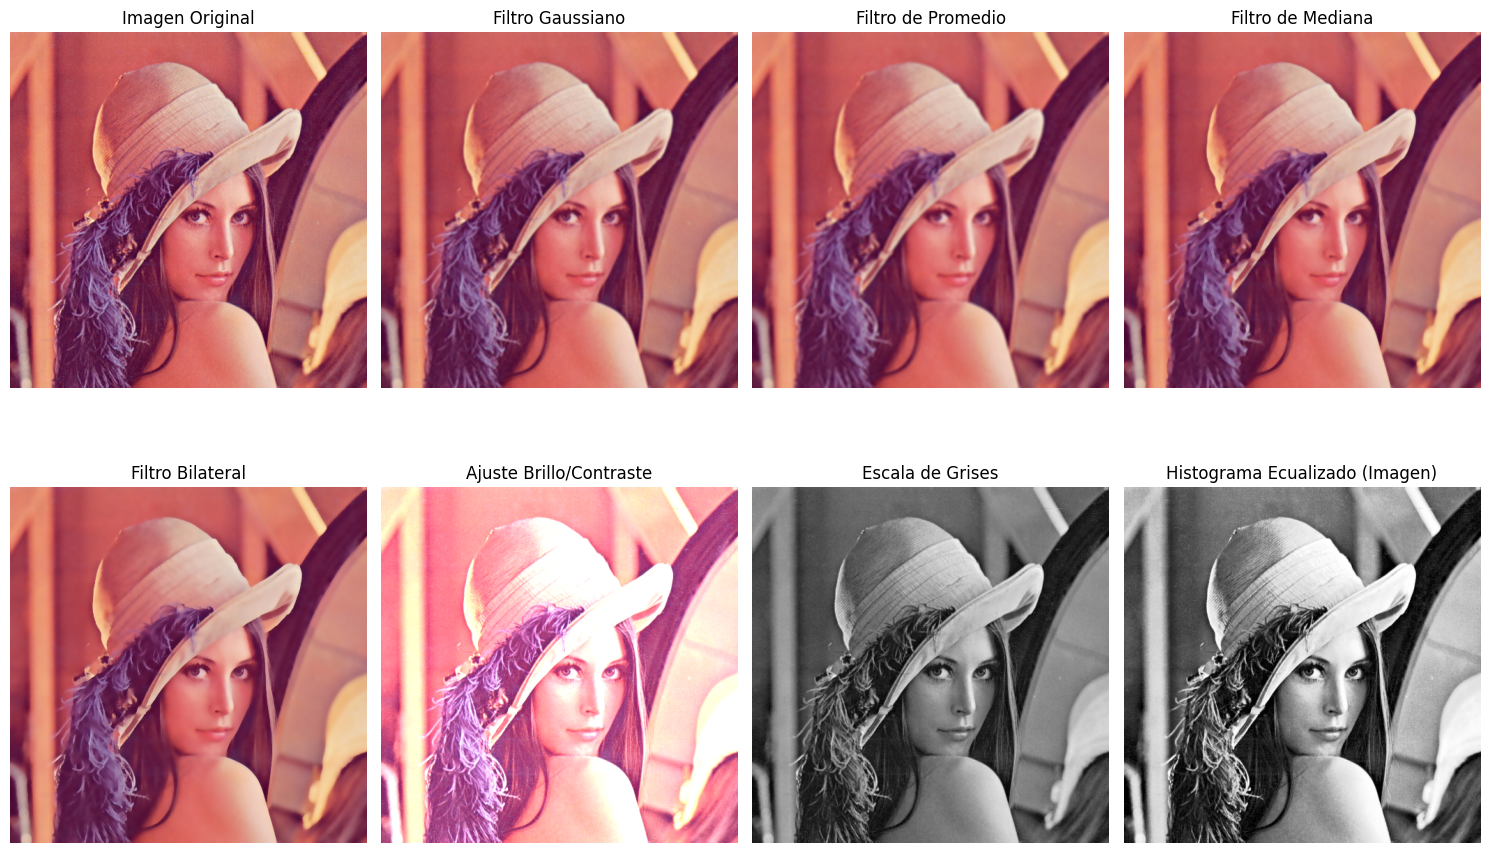

/tmp/ipython-input-974438548.py:111: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0,256]) # Calculamos y mostramos el Histograma
/tmp/ipython-input-974438548.py:118: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0,256]) # Calculamos y mostramos el histograma


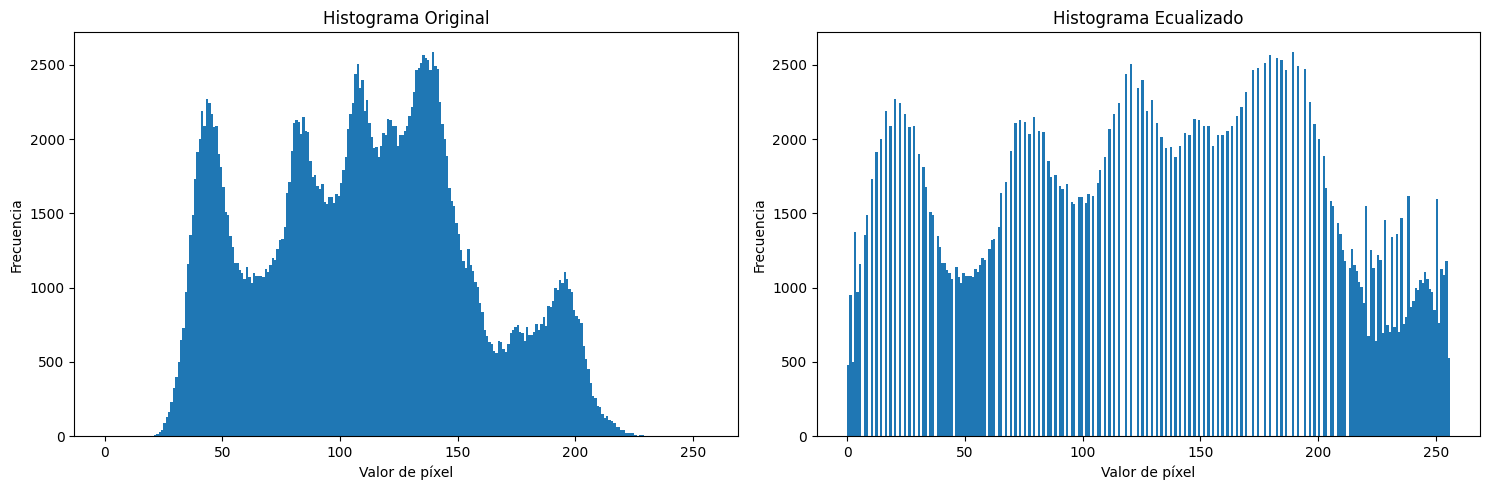

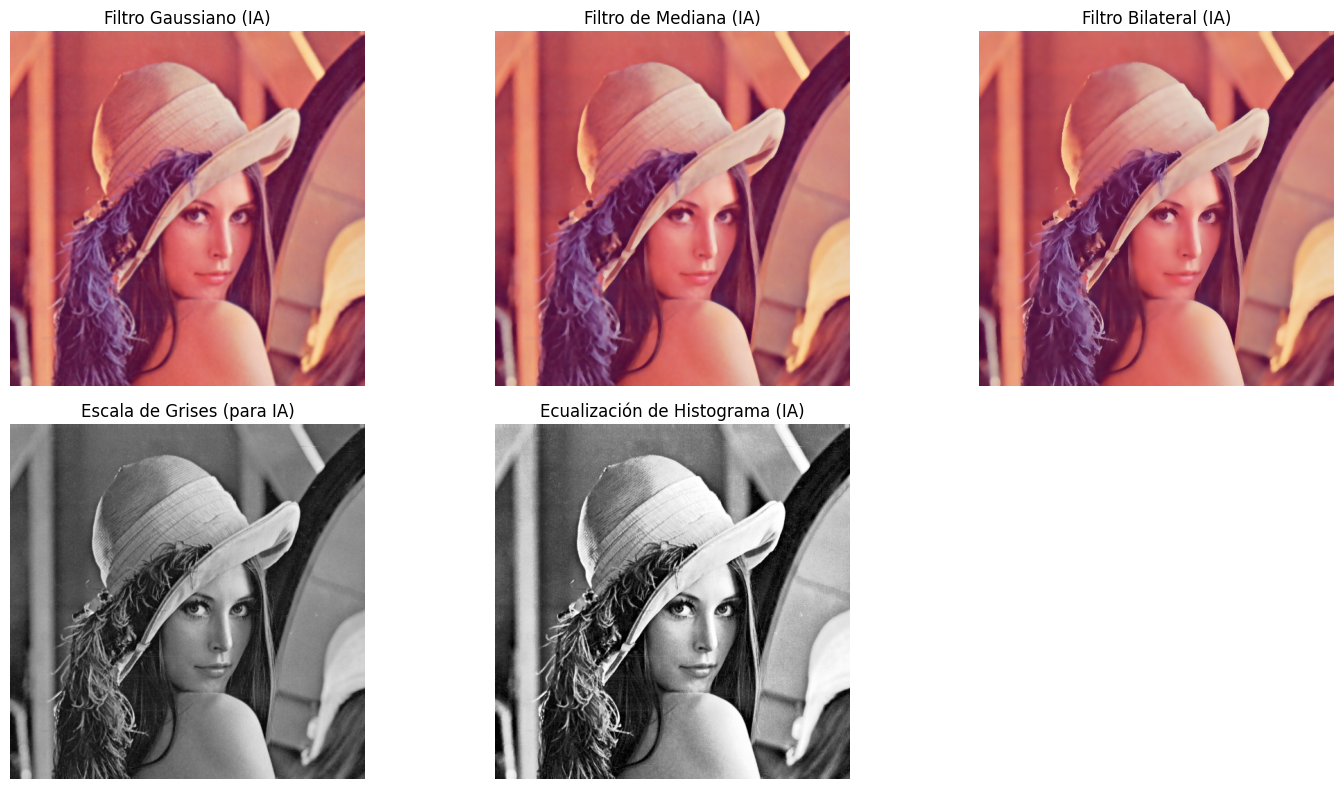

Conclusión:
- El filtro Gaussiano reduce el ruido y mejora la entrada para redes neuronales.
- El filtro de Mediana limpia la imagen sin eliminar bordes importantes.
- El filtro Bilateral suaviza zonas planas, pero conserva contornos útiles para segmentación.
- La Ecualización de Histograma mejora el contraste y ayuda al reconocimiento bajo distintas luces.

Estos filtros son esenciales en el preprocesamiento de imágenes para tareas de Inteligencia Artificial y Visión por Computadora.


In [2]:
# Notebook 3: Filtros y efectos básicos en imágenes

# Importamos las librerías necesarias
import cv2  # Importamos OpenCV para procesamiento de imágenes
import numpy as np  # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow  # Importamos función para mostrar imágenes en Colab

# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para abrir URLs

# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Suavizado de imagen con filtro gaussiano
# Aplicamos un filtro gaussiano para suavizar la imagen (kernel de 5x5)
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)  # (5,5) es el tamaño del kernel, 0 es la desviación estándar

# 2. Filtro de desenfoque medio
# Aplicamos un filtro de promedio para suavizar la imagen (kernel de 5x5)
average_blur = cv2.blur(image_rgb, (5, 5))  # (5,5) es el tamaño del kernel

# 3. Filtro de desenfoque mediano
# Aplicamos un filtro de mediana para reducir el ruido (tamaño de ventana 5)
median_blur = cv2.medianBlur(image_rgb, 5)  # 5 es el tamaño de la ventana

# 4. Filtro de desenfoque bilateral
# Este filtro preserva los bordes mientras suaviza las áreas planas
bilateral_blur = cv2.bilateralFilter(image_rgb, 9, 75, 75)  # 9 es el diámetro del vecindario, 75 son sigma color y espacio

# 5. Ajuste de brillo
# Ajustamos brillo y contraste usando transformacion lineal alpha*img +beta
alpha = 1.5
beta = 30
adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta) #Aplicamos la transformacion

# 6. Ecualización de histograma
# Convertimos a escala de grises
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
# Aplicamos ecualización de histograma para mejorar el contraste
equalized = cv2.equalizeHist(gray_image)

# Visualización de todos los filtros
plt.figure(figsize=(15, 10))  # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(2, 4, 1)  # Creamos un subplot en la posición 1
plt.title('Imagen Original')  # Añadimos un título
plt.imshow(image_rgb)  # Mostramos la imagen original
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro gaussiano
plt.subplot(2, 4, 2)  # Creamos un subplot en la posición 2
plt.title('Filtro Gaussiano')  # Añadimos un título
plt.imshow(blurred_image)  # Mostramos la imagen con filtro gaussiano
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro de promedio
plt.subplot(2, 4, 3)  # Creamos un subplot en la posición 3
plt.title('Filtro de Promedio')  # Añadimos un título
plt.imshow(average_blur)  # Mostramos la imagen con filtro de promedio
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro de mediana
plt.subplot(2, 4, 4)  # Creamos un subplot en la posición 4
plt.title('Filtro de Mediana')  # Añadimos un título
plt.imshow(median_blur)  # Mostramos la imagen con filtro de mediana
plt.axis('off')  # Ocultamos los ejes

# Imagen con filtro bilateral
plt.subplot(2, 4, 5)  # Creamos un subplot en la posición 5
plt.title('Filtro Bilateral')  # Añadimos un título
plt.imshow(bilateral_blur)  # Mostramos la imagen con filtro bilateral
plt.axis('off')  # Ocultamos los ejes

#Imagen con ajuste de brillo y contraste
plt.subplot(2,4,6) # Creamos un subplot en la posición 6
plt. title('Ajuste Brillo/Contraste') # Añadimos un título
plt.imshow(adjusted)  # Mostramos la imagen con ajuste de brillo y contraste
plt.axis('off') # Ocultamos los ejes

#Imagen original en escala de grises
plt.subplot(2,4,7) # Creamos un subplot en la posición 7
plt. title('Escala de Grises') # Añadimos un título
plt.imshow(gray_image, cmap='gray') # Mostramos la imagen en escala de grises
plt.axis('off') # Ocultamos los ejes

# Imagen con ecualizacion de histogramas
plt.subplot(2,4,8) # Creamos un subplot en la posición 8
plt. title('Histograma Ecualizado (Imagen)') # Añadimos un título
plt.imshow(equalized, cmap='gray') # Mostramos la imagen con ecualizacion de histograma
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos\
plt.show() # Mostramos la figura completa

# Visualizacion de Histogramas
plt.figure(figsize=(15,5)) # Creamos una figura con tamaño especifico

# Histograma de la imagen original en escala de grises
plt.subplot(1,2,1) # Creamos un subplot en la posicion 1
plt.title('Histograma Original')
plt.hist(gray_image.ravel(), 256, [0,256]) # Calculamos y mostramos el Histograma
plt.xlabel('Valor de píxel') #Etiqueta eje X
plt.ylabel('Frecuencia') # Etiqueta eje Y

# Histograma de la imagen ecualizada
plt.subplot(1,2,2) # Creamos un subplot en la posición 2
plt.title('Histograma Ecualizado') # Añadimos un título
plt.hist(equalized.ravel(), 256, [0,256]) # Calculamos y mostramos el histograma
plt.xlabel('Valor de píxel') #Etiqueta eje X
plt.ylabel('Frecuencia') # Etiqueta eje Y

plt.tight_layout() # Ajustamos el layout para que no se superpongan los titulos\
plt.show() # Mostramos la figura completa


# ==============================================================
# SECCIÓN EXTRA: Filtros que ayudan al reconocimiento de imágenes en IA
# ==============================================================

# 1️⃣ FILTRO GAUSSIANO - Reducción de ruido y suavizado
# Este filtro ayuda a eliminar pequeñas variaciones (ruido) en la imagen.
# Es muy usado en preprocesamiento para modelos de IA (CNNs, reconocimiento facial, etc.)
gaussian_ai = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# 2️⃣ FILTRO DE MEDIANA - Eliminación de ruido impulsivo sin perder bordes
# Sustituye cada píxel por la mediana de sus vecinos.
# Se utiliza cuando las imágenes tienen ruido tipo “sal y pimienta” (píxeles blancos y negros).
median_ai = cv2.medianBlur(image_rgb, 5)

# 3️⃣ FILTRO BILATERAL - Suavizado preservando bordes
# Este filtro suaviza zonas planas pero mantiene los bordes nítidos.
# Es muy útil para segmentación de objetos y reconocimiento de contornos.
bilateral_ai = cv2.bilateralFilter(image_rgb, 9, 75, 75)

# 4️⃣ ECUALIZACIÓN DE HISTOGRAMA - Mejora de contraste
# Mejora el contraste de la imagen para resaltar detalles importantes.
# Se usa en reconocimiento de rostros y objetos bajo diferentes condiciones de iluminación.
gray_ai = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
equalized_ai = cv2.equalizeHist(gray_ai)

# ==============================================================
# VISUALIZACIÓN DE LOS 4 FILTROS RELACIONADOS CON IA
# ==============================================================

plt.figure(figsize=(15, 8))

# Filtro Gaussiano
plt.subplot(2, 3, 1)
plt.title('Filtro Gaussiano (IA)')
plt.imshow(gaussian_ai)
plt.axis('off')

# Filtro de Mediana
plt.subplot(2, 3, 2)
plt.title('Filtro de Mediana (IA)')
plt.imshow(median_ai)
plt.axis('off')

# Filtro Bilateral
plt.subplot(2, 3, 3)
plt.title('Filtro Bilateral (IA)')
plt.imshow(bilateral_ai)
plt.axis('off')

# Imagen original en escala de grises
plt.subplot(2, 3, 4)
plt.title('Escala de Grises (para IA)')
plt.imshow(gray_ai, cmap='gray')
plt.axis('off')

# Imagen con Ecualización de Histograma
plt.subplot(2, 3, 5)
plt.title('Ecualización de Histograma (IA)')
plt.imshow(equalized_ai, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# CONCLUSIÓN
print("Conclusión:")
print("- El filtro Gaussiano reduce el ruido y mejora la entrada para redes neuronales.")
print("- El filtro de Mediana limpia la imagen sin eliminar bordes importantes.")
print("- El filtro Bilateral suaviza zonas planas, pero conserva contornos útiles para segmentación.")
print("- La Ecualización de Histograma mejora el contraste y ayuda al reconocimiento bajo distintas luces.")
print("\nEstos filtros son esenciales en el preprocesamiento de imágenes para tareas de Inteligencia Artificial y Visión por Computadora.")
